In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

veri = pd.read_csv("C:\\Users\\cdggt\\Desktop\\dava.csv")

In [2]:
X = veri[["Case Duration (Days)",
          "Number of Witnesses",
          "Legal Fees (USD)",
          "Number of Evidence Items",
          "Severity",
          "Outcome"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Tüm Veriler Kmeans için -1 ,1 aralığında tekrar ölçeklendiriyor.

In [3]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

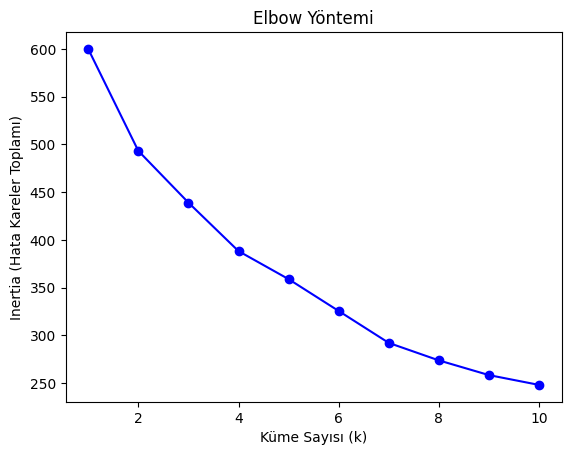

In [ ]:
plt.plot(K, inertia, "bo-")
plt.xlabel("Küme Sayısı")
plt.ylabel("Inertia")
plt.title("Elbow Yöntemi")
plt.show()

Küme sayısı az iken hata oranı yüksek küme sayısı arttıkça hatalardaki azalma oranı da azalıyor 9-10 arasındaki azalmayla 2-3 arasındaki azalmadan analşılabilir
Grafikte birden fazla kırılma noktası var ama en belirgin olanı K=2 ve k=4 için olanlar.

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kume = kmeans.fit_predict(X_scaled)

veri["Kume"] = y_kume
print(veri.head())

   Unnamed: 0  Case Duration (Days)  Number of Witnesses  Legal Fees (USD)  \
0           0                   132                    8             35206   
1           1                   300                   12             46106   
2           2                   136                    2             16411   
3           3                   101                    1              7911   
4           4                   218                   16              6734   

   Number of Evidence Items  Severity  Outcome  Kume  
0                        49         2        0     0  
1                        46         2        1     1  
2                        31         1        1     1  
3                        35         1        0     2  
4                        33         1        0     2  


0 kümesine alınan davalar orta uzunlukta ama yüksek masraflı ve tanık saısı az, 1 olarak kümelenen davalar daha uzun süren yine yüksek masraflı ve tanık sayısı daha fazla,2 kümesindeki davalar kısa sürmüş daha az masraflı az tanıklı davalar olarak ayrıştırılmıs birbirinden. 

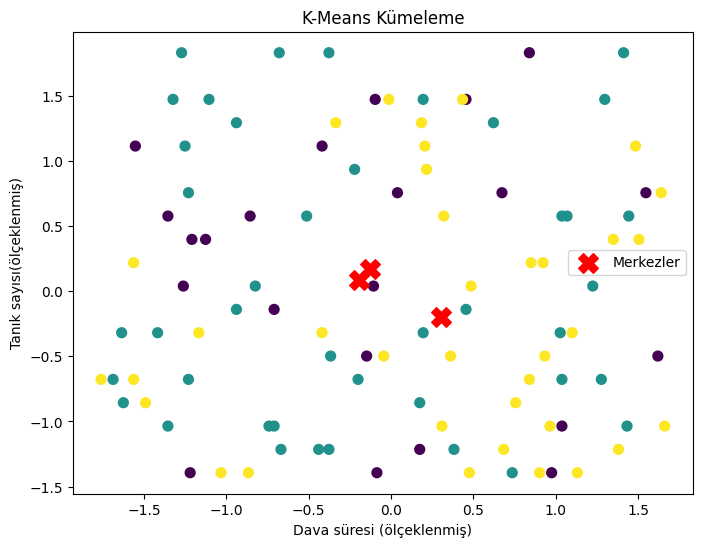

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_kume, cmap="viridis", s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            color="red", marker="X", s=200, label="Merkezler")
plt.xlabel("Dava süresi (ölçeklenmiş)")
plt.ylabel("Tanık sayısı(ölçeklenmiş)")
plt.title("K-Means Kümeleme")
plt.legend()
plt.show()

Merkez noktalarının birbirne bu kadar yakın olması ve dava noktalarnın iyi karısmıs olması kümeleme işleminde çok net ayrımların olmadığını , dava süresi ve tanık sayısı özelliklerinin çok ayırt edici olmadığını gösteriyor.